In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv('News.csv')
print("Original dataset shape:", df.shape)
df.head()
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Saving News.csv to News (3).csv
Original dataset shape: (12520, 2)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import seaborn as sns

# Data Preprocessing

In [3]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|@\S+|[^a-zA-Z\s]", "", text.lower())  # Remove punctuation and numbers
    tokens = re.findall(r'\b\w+\b', text)  # Simple regex tokenization
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()

,text,label,clean_text
0,sing praise mahinda lose voice sri lanka disro...,1,sing praise mahinda lose voice sri lanka disro...
1,kojc rally first time davao city appoint son god,1,kojc rally first time davao city appoint son god
2,bill gate people resist mrna tsunami exclude s...,1,bill gate people resist mrna tsunami exclude s...
3,cure covid19 forward budesonide asthma drug pl...,1,cure covid forward budesonide asthma drug pls ...
4,president trump form patriot party 81 day elec...,1,president trump form patriot party day electio...


In [4]:

df['clean_text'] = df['clean_text'].apply(lambda x: x.split())
df['clean_text']

,clean_text
0,"[sing, praise, mahinda, lose, voice, sri, lank..."
1,"[kojc, rally, first, time, davao, city, appoin..."
2,"[bill, gate, people, resist, mrna, tsunami, ex..."
3,"[cure, covid, forward, budesonide, asthma, dru..."
4,"[president, trump, form, patriot, party, day, ..."
...,...
12515,"[kosher, economy, businesse, israel, include, ..."
12516,"[scene, authority, force, vaccination, people,..."
12517,"[world, briefing, africa, south, africa, setba..."
12518,"[text, image, read, daniel, andrew, net, worth..."


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from matplotlib import pyplot as plt

# **Term frequency-inverse document frequency (TF-IDF)**


In [6]:
Tf_idf = TfidfVectorizer(max_features=5000)
X_Tf_idf = Tf_idf.fit_transform(df['clean_text'].apply(lambda x: ' '.join(x))).toarray()
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X_Tf_idf, y, test_size=0.2, random_state=63)


# **Machine Learning Models (Logistic, Nave Bayes, SVM, Random Forest)**


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression(max_iter=1000)
nb = MultinomialNB()
svc = SVC(probability=True)
rf = RandomForestClassifier(n_estimators=100)

## 1- Logistic Regression


In [8]:
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)

In [9]:
print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')


      train accuracy score : 95.89
      test accuracy score : 92.37%
      recall score : 95.94%
      f1 score : 93.38%
      precision score : 90.96%
      


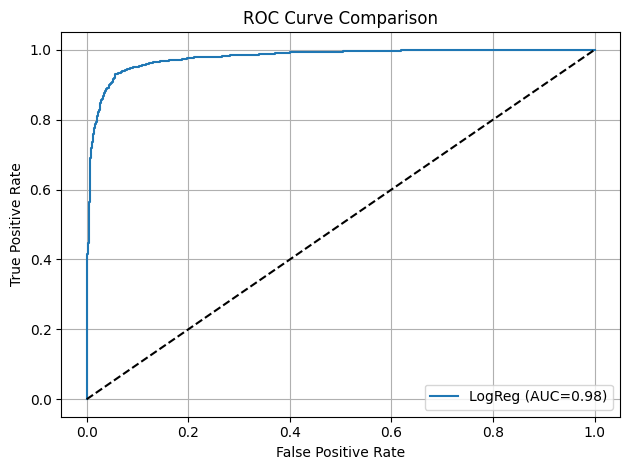

In [16]:
plt.plot(fpr, tpr, label=f'LogReg (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'], yticklabels=df['clean_text'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2- Nave Bayes

In [10]:
nb.fit(X_train,y_train)
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)

In [11]:
print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')


      train accuracy score : 94.35
      test accuracy score : 92.49%
      recall score : 93.95%
      f1 score : 93.35%
      precision score : 92.76%
      


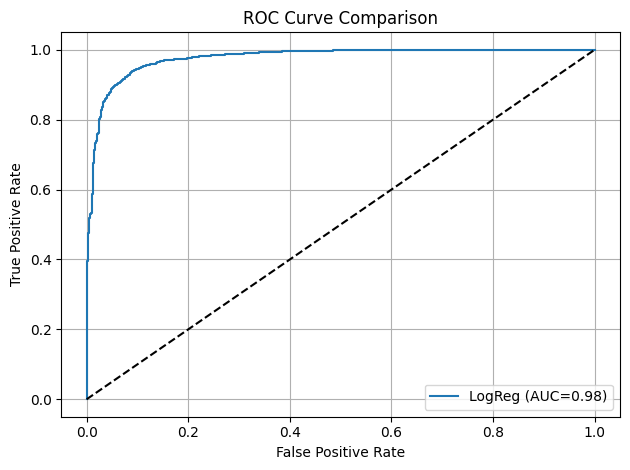

In [19]:

plt.plot(fpr, tpr, label=f'LogReg (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'], yticklabels=df['clean_text'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



## 3- Support Vector Machine (SVM)

In [ ]:
svc.fit(X_train,y_train)


In [ ]:
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)

print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')

In [ ]:
plt.plot(fpr, tpr, label=f'LogReg (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'], yticklabels=df['clean_text'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 4- Random Forest


In [12]:
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)

print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')


      train accuracy score : 100.0
      test accuracy score : 90.69%
      recall score : 91.6%
      f1 score : 91.7%
      precision score : 91.8%
      


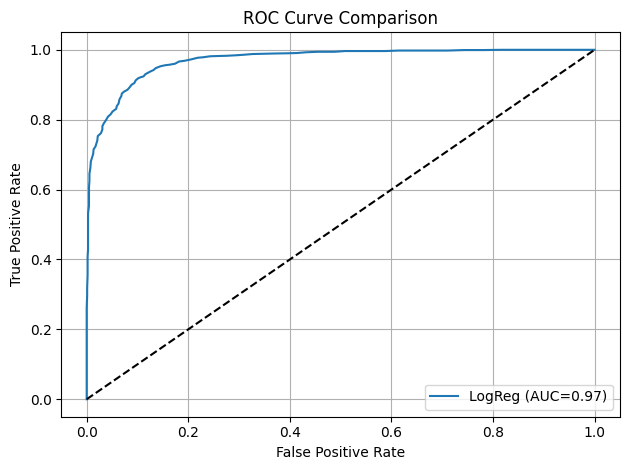

In [21]:
plt.plot(fpr, tpr, label=f'LogReg (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'], yticklabels=df['clean_text'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_text'])
X_seq = tokenizer.texts_to_sequences(df['clean_text'])
X_pad = pad_sequences(X_seq, maxlen=50)
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=63)


## **LSTM Model**


In [23]:
lstm = Sequential([
    Embedding(5000, 128, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train, y_train, epochs=2, batch_size=128, validation_split=0.1, verbose=0)


In [26]:
y_test_prob = lstm.predict(X_test).ravel()
y_test_pred = (y_test_prob >= 0.5).astype(int)
y_train_prob = lstm.predict(X_train).ravel()
y_train_pred = (y_train_prob >= 0.5).astype(int)
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [29]:
print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')


      train accuracy score : 97.76
      test accuracy score : 91.77%
      recall score : 96.65%
      f1 score : 92.95%
      precision score : 89.52%
      


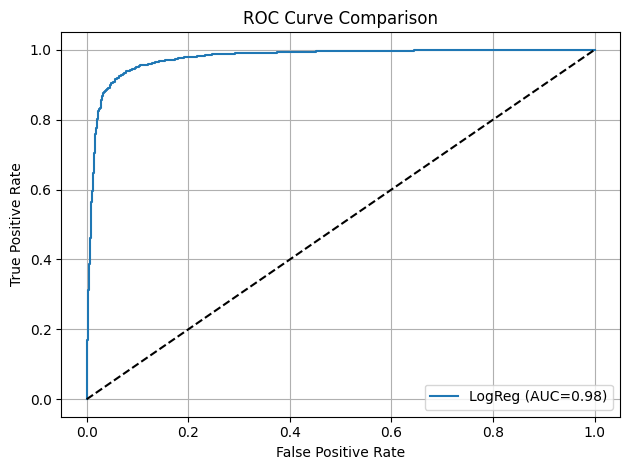

In [28]:

plt.plot(fpr, tpr, label=f'LogReg (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'], yticklabels=df['clean_text'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

KeyboardInterrupt: 

## RNN Model

In [15]:
rnn = Sequential([
    Embedding(5000, 128, input_length=50),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn.fit(X_train, y_train, epochs=2, batch_size=128, validation_split=0.1, verbose=0)


In [17]:
y_test_prob = rnn.predict(X_test).ravel()
y_test_pred = (y_test_prob >= 0.5).astype(int)
y_train_prob = rnn.predict(X_train).ravel()
y_train_pred = (y_train_prob >= 0.5).astype(int)
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [18]:
print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')


      train accuracy score : 96.39
      test accuracy score : 90.97%
      recall score : 96.23%
      f1 score : 92.29%
      precision score : 88.66%
      


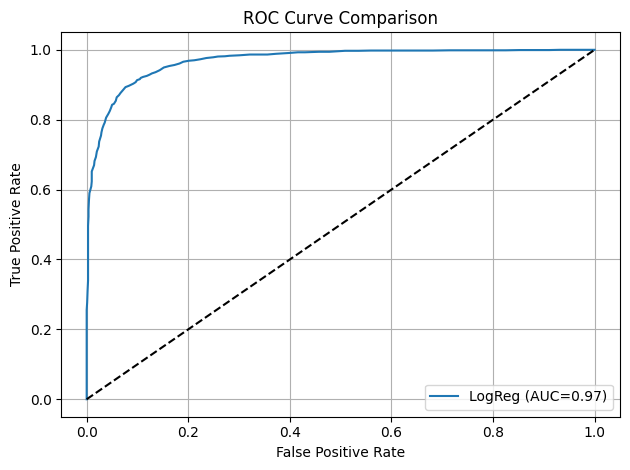

In [19]:
plt.plot(fpr, tpr, label=f'LogReg (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'], yticklabels=df['clean_text'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()